somar 2016.1 + 2016.2 e 2017.1 + 2017.2

Filtrar apenas os pares de ligação comuns aos dois anos (possui valor != null em 2016 e 2017)



In [1]:
import pandas as pd
df = pd.read_excel("PesquisaOD_2016_2017.xlsx", sheet_name=['BD_1PNT2016','BD_2PNT2016','BD_1PNT2017','BD_2PNT2017'])
#Separando abas do arquivo
df2 = df ['BD_1PNT2016']
df3 = df['BD_2PNT2016']
df4 = df['BD_1PNT2017']
df5 = df['BD_2PNT2017']

# Concatenando os anos

DFmerged1 = pd.concat([df2, df3])
DFmerged2 = pd.concat([df4, df5])

DFmerged1 = DFmerged1.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','considerar_parOD?','considerar_socio?']] 

#Retirando origens e destinos que são diferentes do Brasil

DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['PDestino'] != 'Brasil'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['POrigem'] != 'Brasil'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['FreqPeriodo'] == 'Informação não registrada'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['QtdPessoasVeic'] == 'Informação não registrada'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['considerar_parOD?'] == '0'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['considerar_socio?'] == '0'].index)
DFmerged1 = DFmerged1.dropna(subset=['QtdPessoasVeic'])
DFmerged1['FreqQnt'] = DFmerged1['FreqQnt'].replace('>10', 11)

DFmerged2 = DFmerged2.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','considerar_parOD?','considerar_socio?']] 

#Retirando origens e destinos que são diferentes do Brasil
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['PDestino'] != 'Brasil'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['POrigem'] != 'Brasil'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['FreqPeriodo'] == 'Informação não registrada'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['QtdPessoasVeic'] == 'Informação não registrada'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['considerar_parOD?'] == '0'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['considerar_socio?'] == '0'].index)
DFmerged2 = DFmerged2.dropna(subset=['QtdPessoasVeic'])
DFmerged2['FreqQnt'] = DFmerged2['FreqQnt'].replace('>10', 11)




In [46]:
#Calculando frequencias semanais
def multiplicarfrequencia(row):

    frequencia = row['FreqPeriodo']
    frequenciaQtd = row['FreqQnt']

    if frequencia == 'Semana':
        return  frequenciaQtd
    elif frequencia == 'Dia':
        return (frequenciaQtd * 7)
    elif frequencia == 'Mes':
        return (frequenciaQtd / 4)
    else: #ano ou eventualmente!
        return (frequenciaQtd / 52)

DFmerged1['FreqSem'] = DFmerged1.apply(multiplicarfrequencia, axis=1)
DFmerged2['FreqSem'] = DFmerged2.apply(multiplicarfrequencia, axis=1)

# Realizar o agrupamento e a soma
fatores = [ 'O1','O2','O3','P2']

# Filtrar os valores da coluna com base nos transportes
DFmerged1 = DFmerged1[DFmerged1['Classe'].isin(fatores)]
DFmerged2 = DFmerged2[DFmerged2['Classe'].isin(fatores)]

dfRes1 = DFmerged1.loc[:, ['MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino','FreqSem']] 
dfRes2 = DFmerged2.loc[:, ['MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino','FreqSem']] 
dfRes1 = dfRes1.rename(columns={'FreqSem': 'FreqSem 2016'})
dfRes2 = dfRes2.rename(columns={'FreqSem': 'FreqSem 2017'})

display(dfRes1)
display(dfRes2)

,MOrigem,UFOrigem,GeocodOrigem,MDestino,UFDestino,GeocodDestino,FreqSem 2016
14,Frederico Westphalen,RS,4308508.0,Frederico Westphalen,RS,4308508.0,7.000000
39,Sorocaba,SP,3552205.0,Vacaria,RS,4322509.0,0.019231
44,Curitiba,PR,4106902.0,Papanduva,SC,4212205.0,0.019231
350,Laranjeiras do Sul,PR,4113304.0,Catanduvas,PR,4105003.0,0.384615
420,Paranaguá,PR,4118204.0,Cascavel,PR,4104808.0,1.000000
...,...,...,...,...,...,...,...
296836,Paraibano,MA,2107704.0,Colinas,MA,2103505.0,10.000000
296840,Araripina,PE,2601102.0,Colinas,MA,2103505.0,0.019231
296852,Colinas,MA,2103505.0,Colinas,MA,2103505.0,7.000000
296902,Colinas,MA,2103505.0,Barra do Corda,MA,2101608.0,0.019231


,MOrigem,UFOrigem,GeocodOrigem,MDestino,UFDestino,GeocodDestino,FreqSem 2017
33,São Domingos do Araguaia,PA,1507151.0,Marabá,PA,1504208.0,7.000000
44,Marabá,PA,1504208.0,Marabá,PA,1504208.0,14.000000
67,Anajatuba,MA,2100709.0,Marabá,PA,1504208.0,2.000000
169,Marabá,PA,1504208.0,São João do Araguaia,PA,1507508.0,0.019231
384,Marabá,PA,1504208.0,São Domingos do Araguaia,PA,1507151.0,7.000000
...,...,...,...,...,...,...,...
348192,São Paulo,SP,3550308.0,Vitória da Conquista,BA,2933307.0,0.038462
348193,São Paulo,SP,3550308.0,Belo Horizonte,MG,3106200.0,2.000000
348249,São Lourenço,MG,3163706.0,Belo Horizonte,MG,3106200.0,0.019231
348264,Oliveira,MG,3145604.0,Carmópolis de Minas,MG,3114501.0,7.000000


In [38]:
#GroupBy

agrupado1 = dfRes1.groupby(['GeocodOrigem']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','FreqSem 2016':'sum'})
agrupado2 = dfRes2.groupby(['GeocodOrigem']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','FreqSem 2017':'sum'})

agrupado1 = agrupado1.reset_index()
agrupado2 = agrupado2.reset_index()

agrupado1['GeocodOrigem'] = agrupado1['GeocodOrigem'].astype(int)
agrupado1['GeocodDestino'] = agrupado1['GeocodDestino'].astype(int)
agrupado2['GeocodOrigem'] = agrupado2['GeocodOrigem'].astype(int)
agrupado2['GeocodDestino'] = agrupado2['GeocodDestino'].astype(int)

df_merged = pd.merge(agrupado1, agrupado2, on=['GeocodOrigem', 'GeocodDestino'])

#Mesclando UF e Mun Numa unica coluna
sep = '/'
df_merged['Cidade/EstadoOrigem'] = df_merged[['MOrigem_x', 'UFOrigem_x']].apply(lambda x: sep.join(x.astype(str)), axis=1)
df_merged['Cidade/EstadoDestino'] = df_merged[['MDestino_x', 'UFDestino_x']].apply(lambda x: sep.join(x.astype(str)), axis=1)
df_merged = df_merged.loc[:, ['GeocodOrigem', 'GeocodDestino','FreqSem 2016','FreqSem 2017','Cidade/EstadoOrigem', 'Cidade/EstadoDestino']] 
display(df_merged)


,GeocodOrigem,GeocodDestino,FreqSem 2016,FreqSem 2017,Cidade/EstadoOrigem,Cidade/EstadoDestino
0,2203909,2304400,9.019231,266.480769,Floriano/PI,Fortaleza/CE
1,2207702,5300108,0.076923,27.500000,Parnaíba/PI,Brasília/DF
2,2311306,2304400,1.057692,132.269231,Quixadá/CE,Fortaleza/CE
3,2512309,2604106,0.038462,3.038462,Princesa Isabel/PB,Caruaru/PE
4,2605152,2611101,19.038462,17.057692,Dormentes/PE,Petrolina/PE
5,2615706,2611606,0.153846,0.019231,Triunfo/PE,Recife/PE
6,2705002,3550308,0.076923,0.076923,Mata Grande/AL,São Paulo/SP
7,2706109,3550308,0.038462,0.019231,Ouro Branco/AL,São Paulo/SP
8,2903409,2927408,0.019231,1.000000,Belmonte/BA,Salvador/BA
9,2914703,2612505,14.115385,0.076923,Itaberaba/BA,Santa Cruz do Capibaribe/PE


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

dfx = pd.read_csv("ibge_dnit.csv")

#Somando os valores de 2016
soma=dfx['dnit_2016_1'].add(dfx['dnit_2016_2'], fill_value=0)
dfx['dnit-2016'] = soma

#Somando os valores de 2017
soma1=dfx['dnit_2017_1'].add(dfx['dnit_2017_2'], fill_value=0)
dfx['dnit-2017'] = soma1

df_final= dfx[dfx['dnit-2016'].notna()]
df_final= df_final[df_final['dnit-2017'].notna()]

display(df_final)


,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit_2017_1,dnit_pessoas_2017_1,dnit_sel_2017_1,dnit_pessoas_sel_2017_1,dnit_2017_2,dnit_pessoas_2017_2,dnit_sel_2017_2,dnit_pessoas_sel_2017_2,dnit-2016,dnit-2017
3,2300150,2304400,716.0,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,0.004791,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.004791
57,2110609,2111300,68.0,NaN,NaN,NaN,NaN,0.557534,8.0,NaN,...,0.004791,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.557534,0.004791
71,2307304,2933307,6.0,NaN,NaN,NaN,NaN,0.004791,0.0,NaN,...,0.057534,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.057534
195,3170206,5201405,77.0,NaN,NaN,NaN,NaN,2.861618,25.0,NaN,...,1.000000,1.0,NaN,NaN,2.744511,11.0,NaN,NaN,2.861618,3.744511
198,2307304,2910800,8.0,NaN,NaN,NaN,NaN,0.230137,3.0,NaN,...,0.672603,5.0,NaN,NaN,0.014374,5.0,NaN,NaN,0.230137,0.686976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212680,5300108,5219712,NaN,NaN,NaN,NaN,NaN,0.115069,2.0,NaN,...,0.119860,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.115069,0.119860
212683,5300108,5220280,NaN,NaN,NaN,NaN,NaN,0.500000,2.0,NaN,...,NaN,NaN,NaN,NaN,0.250000,3.0,NaN,NaN,0.500000,0.250000
212684,5300108,5220405,NaN,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,0.057534,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.057534
212687,5300108,5221577,NaN,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,NaN,NaN,NaN,NaN,0.057534,2.0,NaN,NaN,0.004791,0.057534


In [61]:
# Calcular as diferenças entre as colunas
df_final['Diferenca'] = df_final['dnit-2017'] - df_final['dnit-2016']

# Calcular a maior diferença
maior_diferenca = df_final['Diferenca'].max()

# Calcular a menor diferença
menor_diferenca = df_final['Diferenca'].min()

# Calcular a média das diferenças
media_diferencas = df_final['Diferenca'].mean()

# Exibir os resultados
print("Maior diferença:", maior_diferenca)
print("Menor diferença:", menor_diferenca)
print("Média das diferenças:", media_diferencas)

Maior diferença: 966.4997522499999
Menor diferença: -1738.40598775
Média das diferenças: 0.7073889741122665


Correlação


In [62]:

print("DNIT 2016 - 2017")
print(df_final[["dnit-2016","dnit-2017"]].corr())
print()


DNIT 2016 - 2017
           dnit-2016  dnit-2017
dnit-2016   1.000000   0.061527
dnit-2017   0.061527   1.000000



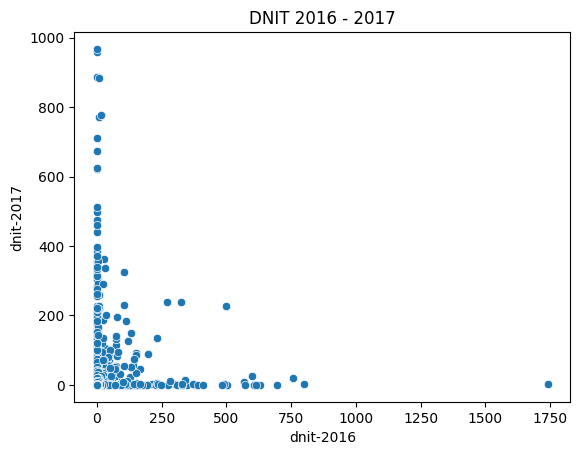

In [65]:
sns.scatterplot(data=df_final, x="dnit-2016", y="dnit-2017").set(title="DNIT 2016 - 2017")
plt.show()